In [1]:
# Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
%matplotlib inline

# Loading dataset

In [2]:
# Loading dataset
diabetes = pd.read_csv('data/diabetes_data_upload.csv')
obesity = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
# Preview Data
#diabetes['class'].value_counts()

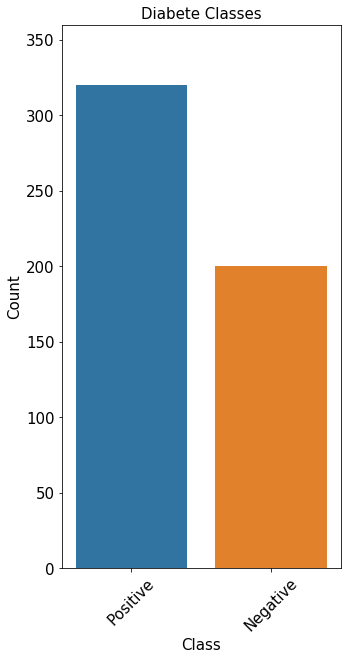

In [4]:
plt.figure(figsize=(5, 10))
ax1 = sns.countplot(diabetes['class'])
ax1.set(ylim=(0, 360))
plt.xticks(rotation=45)
ax1.axes.set_title("Diabete Classes",fontsize=15)
ax1.set_xlabel("Class",fontsize=15)
ax1.set_ylabel("Count",fontsize=15)
ax1.tick_params(labelsize=15)
plt.savefig('fig1.jpg')

In [5]:
#obesity['NObeyesdad'].value_counts()

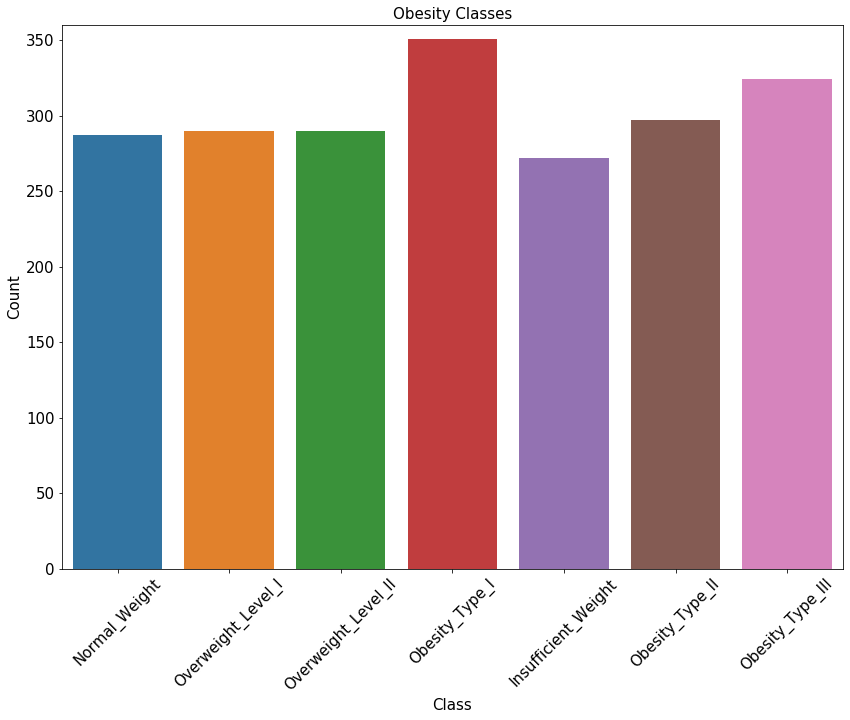

In [6]:
plt.figure(figsize=(14, 10))
ax2 = sns.countplot(obesity['NObeyesdad'])
ax2.set(ylim=(0, 360))
plt.xticks(rotation=45)
ax2.axes.set_title("Obesity Classes",fontsize=15)
ax2.set_xlabel("Class",fontsize=15)
ax2.set_ylabel("Count",fontsize=15)
ax2.tick_params(labelsize=15)
plt.savefig('fig2.jpg')

# Preprocessing Data

In [7]:
# split features and labels
x = diabetes.drop('class', axis=1)
y = diabetes['class']

In [8]:
# encode features to integer
trans_columns = x.columns[x.dtypes == 'O']
enc = OrdinalEncoder()
enc.fit(x[trans_columns])
x[trans_columns] = enc.transform(x[trans_columns])

In [9]:
# encode labels to interger
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
# split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=78)

In [11]:
# split features and labels
x2 = obesity.drop('NObeyesdad', axis=1)
y2 = obesity['NObeyesdad']

In [12]:
# encode features to integer
trans_columns = x2.columns[x2.dtypes == 'O']
enc = OrdinalEncoder()
enc.fit(x2[trans_columns])
x2[trans_columns] = enc.transform(x2[trans_columns])

In [13]:
# encode labels to interger
le = LabelEncoder()
y2 = le.fit_transform(y2)

In [14]:
# split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=78)

# Decition Tree Classifier

In [15]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=78)
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [16]:
dtcs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=78, ccp_alpha=ccp_alpha)
    dtc.fit(x_train, y_train)
    dtcs.append(dtc)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dtcs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12968248214737005


[0.         0.00047393 0.00051836 0.00053856 0.00057596 0.00058008
 0.00058165 0.00058358 0.00059242 0.00059242 0.00059242 0.00078989
 0.00078989 0.00078989 0.00086324 0.00088863 0.00093799 0.00094787
 0.00098736 0.00098736 0.00101557 0.00101557 0.00103673 0.00108328
 0.0011164  0.00112427 0.00113647 0.00115406 0.00117774 0.00118046
 0.00118483 0.00141635 0.0014218  0.00148624 0.00150544 0.00155539
 0.00163097 0.0016851  0.00176423 0.00179102 0.00203114 0.00220901
 0.00225221 0.0022658  0.00231372 0.0026121  0.00264895 0.0028436
 0.0029421  0.00301443 0.00301594 0.00305461 0.00316492 0.00330061
 0.00330651 0.00367413 0.00395468 0.00409858 0.00452469 0.00453869
 0.005391   0.00614957 0.00656253 0.00675785 0.00729313 0.00833772
 0.00907023 0.00944629 0.01023445 0.0124763  0.01806188 0.01981616
 0.02590706 0.02820228 0.02870137 0.03635249 0.04433788 0.08678501
 0.12968248] [0.9361702127659575, 0.9361702127659575, 0.9385342789598109, 0.9385342789598109, 0.9432624113475178, 0.94326241134751

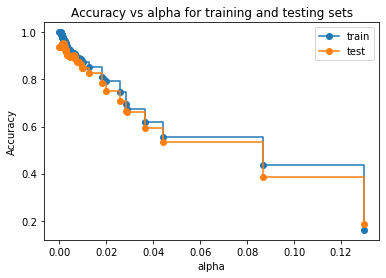

In [17]:
train_scores = [dtc.score(x_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(x_test, y_test) for dtc in dtcs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('fig3b.jpg')
print(ccp_alphas, test_scores)

In [18]:
estimator = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42, ccp_alpha=0.00058358)
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, x_train, y_train, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

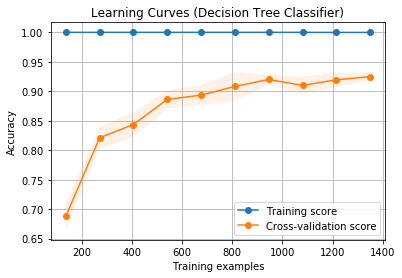

In [19]:
# Plot learning curve
fig, ax = plt.subplots()
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Learning Curves (Decision Tree Classifier)")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1)
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('fig4b.jpg')

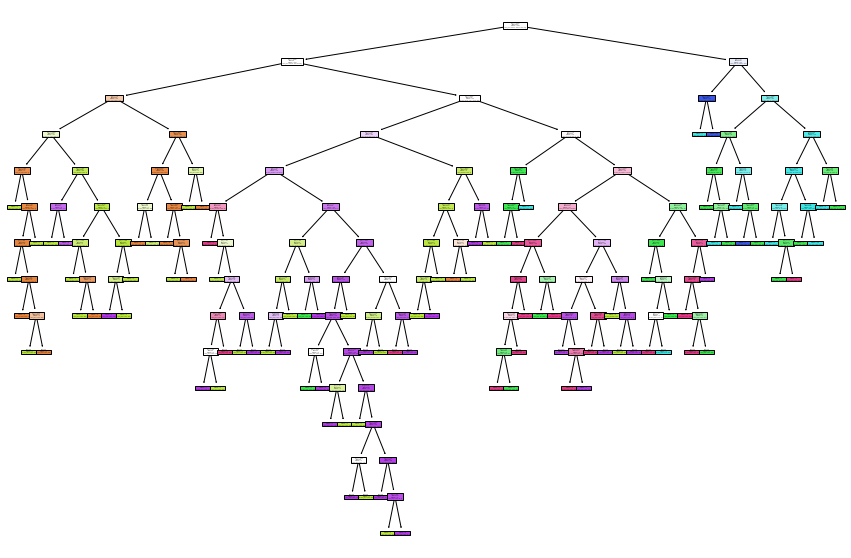

In [20]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtcs[6], filled=True)
plt.savefig('fig4d.jpg')

# Neural Network

In [21]:
np.random.seed(2)
mlpcs_relu = []
hidden_layers = []
for i in range(10):
    hidden_layers.append(10)
    mlpc = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers), activation='relu', solver='adam', alpha=0.0001, max_iter=2000, validation_fraction=0.2, random_state=0)
    mlpc.fit(x_train, y_train)
    mlpcs_relu.append(mlpc)
mlpcs_tanh = []
hidden_layers = []
for i in range(10):
    hidden_layers.append(10)
    mlpc = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers), activation='tanh', solver='adam', alpha=0.0001, max_iter=2000, validation_fraction=0.2, random_state=0)
    mlpc.fit(x_train, y_train)
    mlpcs_tanh.append(mlpc)

range(1, 11) [[0.72189349 0.70414201 0.66863905 0.68545994 0.65875371]
 [0.83136095 0.80473373 0.80177515 0.85163205 0.81602374]
 [0.85798817 0.86390533 0.80769231 0.85756677 0.83086053]
 [0.87278107 0.86390533 0.89349112 0.90504451 0.89614243]
 [0.88461538 0.86390533 0.9112426  0.90207715 0.90504451]
 [0.9260355  0.86094675 0.90828402 0.92581602 0.91988131]
 [0.92011834 0.92011834 0.91420118 0.91097923 0.9347181 ]
 [0.93786982 0.89349112 0.90236686 0.90504451 0.91097923]
 [0.9408284  0.9112426  0.90532544 0.91988131 0.91988131]
 [0.92899408 0.92899408 0.9260355  0.91097923 0.92878338]]


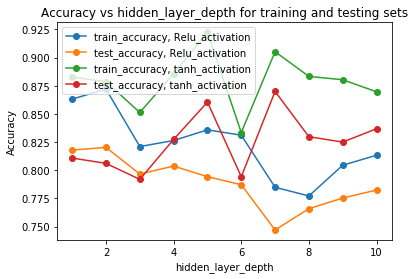

In [22]:
train_scores_relu = [mlpc.score(x_train, y_train) for mlpc in mlpcs_relu]
test_scores_relu = [mlpc.score(x_test, y_test) for mlpc in mlpcs_relu]
train_scores_tanh = [mlpc.score(x_train, y_train) for mlpc in mlpcs_tanh]
test_scores_tanh = [mlpc.score(x_test, y_test) for mlpc in mlpcs_tanh]

fig, ax = plt.subplots()
ax.set_xlabel("hidden_layer_depth")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs hidden_layer_depth for training and testing sets")
ax.plot(range(1,11), train_scores_relu, marker='o', label="train_accuracy, Relu_activation")
ax.plot(range(1,11), test_scores_relu, marker='o', label="test_accuracy, Relu_activation")
ax.plot(range(1,11), train_scores_tanh, marker='o', label="train_accuracy, tanh_activation")
ax.plot(range(1,11), test_scores_tanh, marker='o', label="test_accuracy, tanh_activation")
ax.legend()
plt.savefig('fig5b.jpg')
print(range(1,11), test_scores)

In [23]:
estimator = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), activation='tanh', solver='adam', alpha=0.0001, max_iter=2000, validation_fraction=0.2, random_state=0)
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, x_train, y_train, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

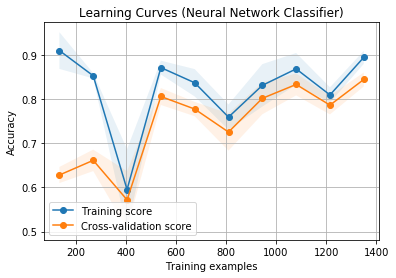

In [24]:
# Plot learning curve
fig, ax = plt.subplots()
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Learning Curves (Neural Network Classifier)")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1)
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('fig6b.jpg')

# Boosting Classifier

In [25]:
np.random.seed(2)
n_boost_1 = []
for i in range(1,51):
    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=i, algorithm='SAMME', learning_rate=1, random_state=0)
    boost.fit(x_train, y_train)
    n_boost_1.append(boost)
n_boost_2 = []
for i in range(1,51):
    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=i, algorithm='SAMME', learning_rate=1, random_state=0)
    boost.fit(x_train, y_train)
    n_boost_2.append(boost)
n_boost_3 = []
for i in range(1,51):
    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=i, algorithm='SAMME', learning_rate=1, random_state=0)
    boost.fit(x_train, y_train)
    n_boost_3.append(boost)

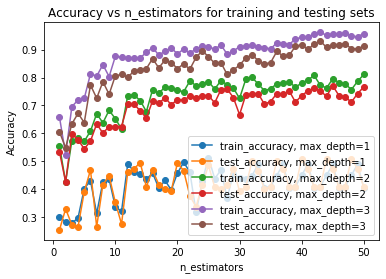

In [26]:
train_scores_depth1 = [boost.score(x_train, y_train) for boost in n_boost_1]
test_scores_depth1 = [boost.score(x_test, y_test) for boost in n_boost_1]
train_scores_depth2 = [boost.score(x_train, y_train) for boost in n_boost_2]
test_scores_depth2 = [boost.score(x_test, y_test) for boost in n_boost_2]
train_scores_depth3 = [boost.score(x_train, y_train) for boost in n_boost_3]
test_scores_depth3 = [boost.score(x_test, y_test) for boost in n_boost_3]

fig, ax = plt.subplots()
ax.set_xlabel("n_estimators")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs n_estimators for training and testing sets")
ax.plot(range(1,51), train_scores_depth1, marker='o', label="train_accuracy, max_depth=1")
ax.plot(range(1,51), test_scores_depth1, marker='o', label="test_accuracy, max_depth=1")
ax.plot(range(1,51), train_scores_depth2, marker='o', label="train_accuracy, max_depth=2")
ax.plot(range(1,51), test_scores_depth2, marker='o', label="test_accuracy, max_depth=2")
ax.plot(range(1,51), train_scores_depth3, marker='o', label="train_accuracy, max_depth=3")
ax.plot(range(1,51), test_scores_depth3, marker='o', label="test_accuracy, max_depth=3")
ax.legend()
plt.savefig('fig7b.jpg')

In [27]:
estimator = boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=40, algorithm='SAMME', learning_rate=1, random_state=0)
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, x_train, y_train, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

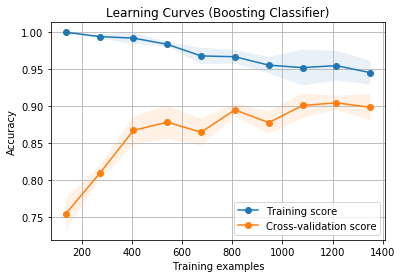

In [28]:
# Plot learning curve
fig, ax = plt.subplots()
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Learning Curves (Boosting Classifier)")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1)
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('fig8b.jpg')

# SVM Classifier

In [29]:
np.random.seed(42)
C = [np.power(10., i) for i in range(-3, 4)]
svc_linear = []
for i in C:
    svc = svm.SVC(C=i, kernel='linear')
    svc.fit(x_train, y_train)
    svc_linear.append(svc)
svc_poly = []
for i in C:
    svc = svm.SVC(C=i, kernel='poly')
    svc.fit(x_train, y_train)
    svc_poly.append(svc)
svc_rbf = []
for i in C:
    svc = svm.SVC(C=i, kernel='rbf')
    svc.fit(x_train, y_train)
    svc_rbf.append(svc)
svc_sigmoid = []

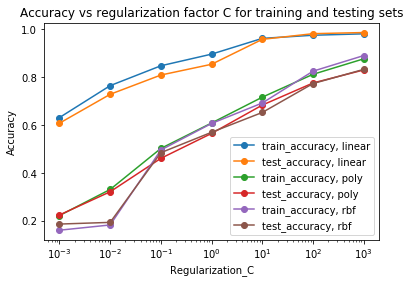

In [30]:
train_scores_linear = [svc.score(x_train, y_train) for svc in svc_linear]
test_scores_linear = [svc.score(x_test, y_test) for svc in svc_linear]
train_scores_poly = [svc.score(x_train, y_train) for svc in svc_poly]
test_scores_poly = [svc.score(x_test, y_test) for svc in svc_poly]
train_scores_rbf = [svc.score(x_train, y_train) for svc in svc_rbf]
test_scores_rbf = [svc.score(x_test, y_test) for svc in svc_rbf]

fig, ax = plt.subplots()
ax.set_xlabel("Regularization_C")
ax.set_xscale("log")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs regularization factor C for training and testing sets")
ax.plot(C, train_scores_linear, marker='o', label="train_accuracy, linear")
ax.plot(C, test_scores_linear, marker='o', label="test_accuracy, linear")
ax.plot(C, train_scores_poly, marker='o', label="train_accuracy, poly")
ax.plot(C, test_scores_poly, marker='o', label="test_accuracy, poly")
ax.plot(C, train_scores_rbf, marker='o', label="train_accuracy, rbf")
ax.plot(C, test_scores_rbf, marker='o', label="test_accuracy, rbf")
ax.legend()
plt.savefig('fig9b.jpg')

In [31]:
estimator = boost = svm.SVC(C=100, kernel='linear')
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, x_train, y_train, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

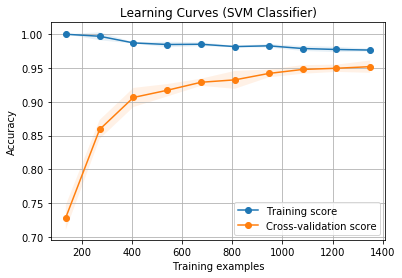

In [32]:
# Plot learning curve
fig, ax = plt.subplots()
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Learning Curves (SVM Classifier)")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1)
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('fig10b.jpg')

# k-Nearest Neighbors Classifier

In [33]:
np.random.seed(2)
k_neigh_euclindean = []
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='uniform', algorithm='kd_tree')
    neigh.fit(x_train, y_train)
    k_neigh_euclindean.append(neigh)
k_neigh_manhattan = []
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='uniform', algorithm='kd_tree')
    neigh.fit(x_train, y_train)
    k_neigh_manhattan.append(neigh)


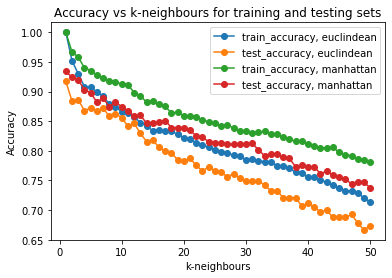

In [34]:
train_scores_euclindean = [neigh.score(x_train, y_train) for neigh in k_neigh_euclindean]
test_scores_euclindean = [neigh.score(x_test, y_test) for neigh in k_neigh_euclindean]
train_scores_manhattan = [neigh.score(x_train, y_train) for neigh in k_neigh_manhattan]
test_scores_manhattan = [neigh.score(x_test, y_test) for neigh in k_neigh_manhattan]

fig, ax = plt.subplots()
ax.set_xlabel("k-neighbours")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs k-neighbours for training and testing sets")
ax.plot(range(1,51), train_scores_euclindean, marker='o', label="train_accuracy, euclindean")
ax.plot(range(1,51), test_scores_euclindean, marker='o', label="test_accuracy, euclindean")
ax.plot(range(1,51), train_scores_manhattan, marker='o', label="train_accuracy, manhattan")
ax.plot(range(1,51), test_scores_manhattan, marker='o', label="test_accuracy, manhattan")
ax.legend()
plt.savefig('fig11b.jpg')

In [35]:
estimator = KNeighborsClassifier(n_neighbors=2, metric='manhattan', weights='uniform', algorithm='kd_tree')
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, x_train, y_train, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

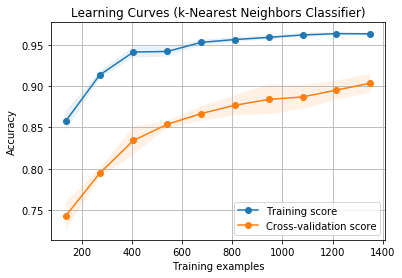

In [36]:
# Plot learning curve
fig, ax = plt.subplots()
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Learning Curves (k-Nearest Neighbors Classifier)")
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1)
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('fig12b.jpg')